# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [56]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [57]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02', '03']
year = '2023'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [5]:
df_yellow.head(5)

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,
2023-03-06 20:23:58,2,2023-03-06 20:31:02,1.0,1.43,1.0,N,246,68,1,9.3,0.0,0.5,2.66,0.0,1.0,15.96,2.5,NaN,0.0
2023-03-06 20:41:25,2,2023-03-06 20:52:35,1.0,1.17,1.0,N,164,233,1,11.4,0.0,0.5,2.25,0.0,1.0,17.65,2.5,NaN,0.0
2023-03-06 21:13:24,2,2023-03-06 21:25:41,2.0,1.27,1.0,N,162,48,1,12.8,0.0,0.5,3.36,0.0,1.0,20.16,2.5,NaN,0.0
2023-03-06 22:02:26,2,2023-03-06 22:34:55,1.0,7.50,1.0,N,68,190,1,36.6,0.0,0.5,10.15,0.0,1.0,50.75,2.5,NaN,0.0
2023-03-07 13:01:28,2,2023-03-07 13:11:17,1.0,2.84,1.0,N,233,232,1,14.2,1.0,0.5,1.00,0.0,1.0,20.20,2.5,NaN,0.0


In [6]:
df_green.head(5)

,VendorID,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,
2023-03-06 20:24:05,2,2023-03-06 20:31:14,N,1.0,236,237,1.0,1.29,9.3,2.5,0.5,3.21,0.00,NaN,1.0,19.26,1.0,1.0,2.75
2023-03-06 20:44:57,2,2023-03-06 21:17:22,N,1.0,166,36,1.0,13.24,54.8,1.0,0.5,12.77,6.55,NaN,1.0,76.62,1.0,1.0,0.00
2023-03-06 20:46:41,2,2023-03-06 20:51:53,N,1.0,75,263,2.0,1.34,8.6,1.0,0.5,2.77,0.00,NaN,1.0,16.62,1.0,1.0,2.75
2023-03-06 20:41:33,2,2023-03-06 20:54:20,N,1.0,82,198,1.0,3.22,16.3,1.0,0.5,0.00,0.00,NaN,1.0,18.80,2.0,1.0,0.00
2023-03-06 20:46:49,2,2023-03-06 20:50:43,N,1.0,75,151,1.0,0.83,5.8,1.0,0.5,2.49,0.00,NaN,1.0,10.79,1.0,1.0,0.00


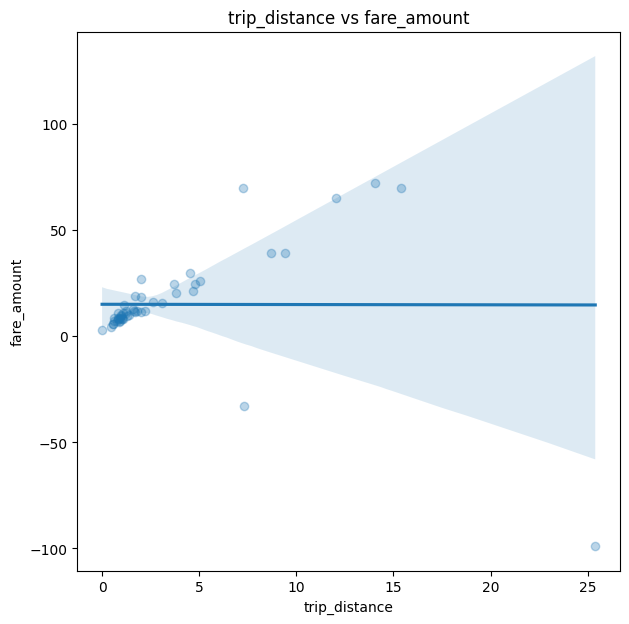

In [4]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

In [18]:
# Write your code
import pandas as pd
import numpy as np #used for scatter plot trend line
import matplotlib.pyplot as plt

# Remove records where trip_distance is 0 or negative
df_yellow = df_yellow[df_yellow['trip_distance'] > 0]
df_green = df_green[df_green['trip_distance'] > 0]

# Remove records where fare_amount is 0 or negative
df_yellow = df_yellow[df_yellow['fare_amount'] > 0]
df_green = df_green[df_green['fare_amount'] > 0]

# Function to remove outliers based on the  Interquartile Range (IQR) method for a given column
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3.75 * IQR #3.75 was found to fit best for the entire dataset
    upper_bound = Q3 + 3.75 * IQR #3.75 was found to fit best for the entire dataset
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Function to display histograms for a given column
def plot_histogram(df, column, color, title, ax, x_label, y_label, bins=None):
    # Determine the number of bins based on the data's range and a reasonable bin width
    if bins is None: #If bins parameter isn't specified, calculate bin width
        bin_width = (df[column].max() - df[column].min()) / 100  # adjust int as necessary for bin size
        bins = np.arange(df[column].min(), df[column].max() + bin_width, bin_width)
    # If bins is an integer, it will define the number of bins directly
    # If bins is a sequence, it will define the bin edges directly

    ax.hist(df[column], bins=bins, color=color, alpha=0.7)
    ax.set_title(title, fontsize=14, weight='bold')
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)

    # Remove top and right border for a cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Simplify the y-axis to show fewer tick marks
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

# Function to create a scatter plot for two given columns
def plot_scatter(df, x_column, y_column, color, title, ax, x_label, y_label):
    ax.scatter(df[x_column], df[y_column], alpha=0.5, color=color, s=1)

    # Trend line
    z = np.polyfit(df[x_column], df[y_column], 1)
    p = np.poly1d(z)
    ax.plot(df[x_column], p(df[x_column]), color="red", linewidth=2, alpha=0.5, label=f'Linear trend line (y={z[0]:.2f}x+{z[1]:.2f})')

     # Enhance readability
    ax.set_title(title, fontsize=16, weight='bold')
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)

    # Remove gridlines and box border for a cleaner look
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')

    # Include a legend that explains the trend line
    ax.legend()

# Clean the data for both yellow and green datasets
df_yellow_clean = remove_outliers(df_yellow, 'trip_distance')
df_yellow_clean = remove_outliers(df_yellow_clean, 'fare_amount')

df_green_clean = remove_outliers(df_green, 'trip_distance')
df_green_clean = remove_outliers(df_green_clean, 'fare_amount')

# 1. Analyzing the Distribution
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), constrained_layout=True)
plot_histogram(df_yellow_clean, 'trip_distance', 'yellow', 'Yellow Taxi: Trip Distance Distribution', axes[0, 0], 'Trip Distance (miles)', 'Frequency')
plot_histogram(df_green_clean, 'trip_distance', 'green', 'Green Taxi: Trip Distance Distribution', axes[0, 1], 'Trip Distance (miles)', 'Frequency')
plot_histogram(df_yellow_clean, 'fare_amount', 'yellow', 'Yellow Taxi: Fare Amount Distribution', axes[1, 0], 'Fare Amount ($)', 'Frequency')
plot_histogram(df_green_clean, 'fare_amount', 'green', 'Green Taxi: Fare Amount Distribution', axes[1, 1], 'Fare amount ($)', 'Frequency')

# For passenger count, we do not remove outliers since it's a discrete variable and generally doesn't have significant outliers
passenger_bins = np.arange(0, df_yellow['passenger_count'].max() + 1, 1) # Bins for passenger count

plot_histogram(df_yellow, 'passenger_count', 'yellow', 'Yellow Taxi: Passenger Count Distribution', axes[2, 0], 'Passenger Count', 'Frequency (millions)', passenger_bins)
plot_histogram(df_green, 'passenger_count', 'green', 'Green Taxi: Passenger Count Distribution', axes[2, 1], 'Passenger Count', 'Frequency', passenger_bins)

# 2. Analyzing Relationships
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
plot_scatter(df_yellow_clean.sample(100000), 'trip_distance', 'fare_amount', 'yellow', 'Yellow Taxi: Trip Distance vs Fare Amount of 100.000 samples', ax, 'Trip Distance (miles)', 'Fare Amount ($)') # Sample to not over clutter the scatter plot

fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
plot_scatter(df_green_clean.sample(100000), 'trip_distance', 'fare_amount', 'green', 'Green Taxi: Trip Distance vs Fare Amount of 100.000 samples', ax, 'Trip Distance (miles)', 'Fare Amount ($)') # Sample to not over clutter the scatter plot

# Show plots
plt.show()

# Calculating Correlation Coefficients
print("Yellow Taxi: Correlation coefficient between trip distance and fare amount of total dataset:")
print(df_yellow_clean[['trip_distance', 'fare_amount']].corr().iloc[0, 1])

print("\nGreen Taxi: Correlation coefficient between trip distance and fare amount of total dataset:")
print(df_green_clean[['trip_distance', 'fare_amount']].corr().iloc[0, 1])

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [19]:
df_zones.head(5)

,Shape_Leng,Shape_Area,zone,LocationID,borough,lat,lng
0,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930


In [5]:
# Write your code

# Remove unused collums
columns_to_keep = ['PULocationID', 'DOLocationID']
df_yellow = df_yellow.loc[:, columns_to_keep]
df_green = df_green.loc[:, columns_to_keep]

# Remove location who is over max locationID
df_yellow_clean = df_yellow[(df_yellow['PULocationID'] <= 263) & (df_yellow['DOLocationID'] <= 263)]
df_green_clean = df_green[(df_green['PULocationID'] <= 263) & (df_green['DOLocationID'] <= 263)]

# Make new data set to each picture
df_yellow_taxi = pd.DataFrame()
df_green_taxi = pd.DataFrame()

# Add the lat and lng from PULocationID
df_yellow_taxi = pd.merge(df_yellow_clean, df_zones[['LocationID', 'lat', 'lng']], left_on='PULocationID', right_on='LocationID', how='left')
df_green_taxi = pd.merge(df_green_clean, df_zones[['LocationID', 'lat', 'lng']], left_on='PULocationID', right_on='LocationID', how='left')

# Rename lat and lng so we can add then again for DOLocationID
df_yellow_taxi.rename(columns={'lat': 'lat_PU', 'lng': 'lng_PU'}, inplace=True)
df_green_taxi.rename(columns={'lat': 'lat_PU', 'lng': 'lng_PU'}, inplace=True)

# Add the lat and lng from DOLocationID
df_yellow_taxi = pd.merge(df_yellow_taxi, df_zones[['LocationID', 'lat', 'lng']], left_on='DOLocationID', right_on='LocationID', how='left')
df_green_taxi = pd.merge(df_green_taxi, df_zones[['LocationID', 'lat', 'lng']], left_on='DOLocationID', right_on='LocationID', how='left')

# Get remove duplicate rows and get an count on how many duplicates there was
df_yellow_taxi_series = df_yellow_taxi.value_counts()
df_yellow_taxi = df_yellow_taxi_series.reset_index()
df_yellow_taxi.columns = [*df_yellow_taxi.columns[:-1], 'count']
df_green_taxi_series = df_green_taxi.value_counts()
df_green_taxi = df_green_taxi_series.reset_index()
df_green_taxi.columns = [*df_green_taxi.columns[:-1], 'count']

# remove unnecesseary small count trips
minium_trips_yellow = 3000
minium_trips_green = 75
df_yellow_taxi = df_yellow_taxi[(df_yellow_taxi['count'] >= minium_trips_yellow)]
df_green_taxi = df_green_taxi[(df_green_taxi['count'] >= minium_trips_green)]

# Make empty map
from keplergl import KeplerGl
map = KeplerGl(height=600)

# Config
config = {'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': 'sr4d85f',
     'type': 'line',
     'config': {'dataId': 'yellow_taxi',
      'label': 'Yellow taxi',
      'color': [137, 218, 193],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat0': 'lat_PU',
       'lng0': 'lng_PU',
       'lat1': 'lat',
       'lng1': 'lng',
       'alt0': None,
       'alt1': None},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'thickness': 1,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'sizeRange': [0, 10],
       'targetColor': None,
       'elevationScale': 1},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'count', 'type': 'integer'},
      'colorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}},
    {'id': '7jknc0w',
     'type': 'line',
     'config': {'dataId': 'green_taxi',
      'label': 'Green taxi',
      'color': [179, 173, 158],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat0': 'lat_PU',
       'lng0': 'lng_PU',
       'lat1': 'lat',
       'lng1': 'lng',
       'alt0': None,
       'alt1': None},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'thickness': 1,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'sizeRange': [0, 10],
       'targetColor': None,
       'elevationScale': 1},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'count', 'type': 'integer'},
      'colorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {'yellow_taxi': [{'name': 'PULocationID',
        'format': None},
       {'name': 'DOLocationID', 'format': None},
       {'name': 'LocationID_x', 'format': None},
       {'name': 'LocationID_y', 'format': None},
       {'name': 'count', 'format': None}],
      'green_taxi': [{'name': 'PULocationID', 'format': None},
       {'name': 'DOLocationID', 'format': None},
       {'name': 'LocationID_x', 'format': None},
       {'name': 'LocationID_y', 'format': None},
       {'name': 'count', 'format': None}]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [{'layers': {'sr4d85f': False, '7jknc0w': True}},
    {'layers': {'sr4d85f': True, '7jknc0w': False}}],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': 40.70939597499655,
   'longitude': -73.9480385959474,
   'pitch': 0,
   'zoom': 9.765323739323783,
   'isSplit': True},
  'mapStyle': {'styleType': 'dark',
   'topLayerGroups': {},
   'visibleLayerGroups': {'label': True,
    'road': True,
    'border': False,
    'building': True,
    'water': True,
    'land': True,
    '3d building': False},
   'threeDBuildingColor': [9.665468314072013,
    17.18305478057247,
    31.1442867897876],
   'mapStyles': {}}}}

# Add data to the map
#map.add_data(data=df_yellow_taxi, name='yellow_taxi')
#map.add_data(data=df_green_taxi, name='green_taxi')

#map.config = config

# Display a map where lighter-colored dots indicate higher activity levels
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=600)



As seen in the above visualization, we have needed to remove trips where the count is below 75 for green taxis and 3000 for yellow taxis. This is done to enhance data visualization, preventing too many lines from obscuring the view.

With this in mind, we can observe that yellow taxis have significantly more trips compared to green taxis, as indicated by the necessary cutoff values for visualization.

Furthermore, we can see that yellow taxis are primarily concentrated around intercity routes and the two local airports in New York. In contrast, green taxis are more locally focused on the outer parts of the city, catering to a greater number of local trips within New York.


### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

In [21]:
# Write your code
from src.TaskFunctions import process_data_temporal, plot_histogram_2_values, plot_line_comparison
# We start with our imports that we need
import matplotlib
import pandas as pd
import numpy as np #used for scatter plot trend line
import matplotlib.pyplot as plt # used to plot the data

# The data that is going to be used is the cleaned up data, that was done in task 2.
# 1. First the data is prepared by converting the data in the pickup column, so that we receive the data as hours, days and month

#sample the data from the cleaned up data in task 2
df_yellow_clean_sample = process_data_temporal(df_yellow_clean, "tpep_pickup_datetime")
df_green_clean_sample = process_data_temporal(df_green_clean, "lpep_pickup_datetime")

# Map numeric values to day names
# Order of days for the plot
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_yellow_clean_sample["day_name"] = df_yellow_clean_sample["day"].map(dict(enumerate(day_names)))
df_green_clean_sample["day_name"] = df_green_clean_sample["day"].map(dict(enumerate(day_names)))
# Now do it for the month names for the plot
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11:"November", 12: "December"}
# Set the 'day_name' column as a Categorical with a specified order
df_yellow_clean_sample["day_name"] = pd.Categorical(df_yellow_clean_sample["day_name"], categories=day_names, ordered=True)
df_green_clean_sample["day_name"] = pd.Categorical(df_green_clean_sample["day_name"], categories=day_names, ordered=True)



# 2. Then the calculation of how many instances of trips happens each hour, day of the week and lastly each month.

# Calculate the count of each hour instance in the DataFrame
yellow_hour_count = df_yellow_clean_sample.groupby("hour")["hour"].count().reset_index(name="count")
green_hour_count = df_green_clean_sample.groupby("hour")["hour"].count().reset_index(name="count")
# Calculate the count of each day in a week instance (monday to sunday) in the DataFrame
yellow_day_count = df_yellow_clean_sample.groupby("day_name")["day_name"].count().reset_index(name="count")
green_day_count = df_green_clean_sample.groupby("day_name")["day_name"].count().reset_index(name="count")
# Calculate the count of each month instance in the DataFrame
yellow_month_count = df_yellow_clean_sample.groupby("month")["month"].count().reset_index(name="count")
green_month_count = df_green_clean_sample.groupby("month")["month"].count().reset_index(name="count")

# 3. Make plots to visually show the data.

# Bar plots to show how the data is spread out in the different time frames.
# Put the plots side by side in columns.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), layout="constrained")

# Bar plot for the hourly splits for both yellow and green taxis
plot_histogram_2_values(axes[0, 0], yellow_hour_count["hour"], yellow_hour_count["count"], "yellow", "Yellow Taxi: Trip count hourly", "Hours", "Trips made")
plot_histogram_2_values(axes[0, 1], green_hour_count["hour"], green_hour_count["count"], "green", "Green Taxi: Trip count hourly", "Hours", "Trips made")

# Bar plot for the daily splits for both yellow and green taxis
plot_histogram_2_values(axes[1, 0], yellow_day_count["day_name"], yellow_day_count["count"], "yellow", "Yellow Taxi: Trip count each day of the week", "Days of the week", "Trips made")
plot_histogram_2_values(axes[1, 1], green_day_count["day_name"], green_day_count["count"], "green", "Green Taxi: Trip count each day of the week", "Days of the week", "Trips made")

# Bar plot for the monthly splits for both yellow and green taxis
plot_histogram_2_values(axes[2, 0], yellow_month_count["month"], yellow_month_count["count"], "yellow", "Yellow Taxi: Trip count each month", "Months", "Trips made", month_names)
plot_histogram_2_values(axes[2, 1], green_month_count["month"], green_month_count["count"], "green", "Green Taxi: Trip count each month", "Months", "Trips made", month_names)

#Now to compare the two results in a better way by comparing them in one plot.

# Create a line plot for trips per hour for both the yellow and green taxi.
plot_line_comparison(yellow_hour_count["hour"], yellow_hour_count["count"], green_hour_count["hour"], green_hour_count["count"], "Hours", "Trips made", "Comparison of trips hourly between Yellow and Green Taxi")

# Create a line plot for trips for each day of the week for both the yellow and green taxi.
plot_line_comparison(yellow_day_count["day_name"], yellow_day_count["count"], green_day_count["day_name"], green_day_count["count"], "Days of the week", "Trips made", "Comparison of trips for each day of the week between Yellow and Green Taxi")

# Create a line plot for trips for each month for both the yellow and green taxi.
plot_line_comparison(yellow_month_count["month"], yellow_month_count["count"], green_month_count["month"], green_month_count["count"], "Months", "Trips made", "Comparison of trips for each month between Yellow and Green Taxi", month_names)



# It is also possible to compare the time with other factors such as trip distance and fare.
# 3. Now to finish it off is to see how it compares with the trip distance and fares compared to time.

# To do this part we need to prepare some data again, this is needed since we want to find the mean of each data to compare with for each time frame.

# Calculate the mean for trip distance for each hour instance in the DataFrame
yellow_hour_trip_dist_mean = df_yellow_clean_sample.groupby("hour")["trip_distance"].mean().reset_index(name="trip_dist_mean")
green_hour_trip_dist_mean = df_green_clean_sample.groupby("hour")["trip_distance"].mean().reset_index(name="trip_dist_mean")
# Calculate the mean for trip distance for each day in a week in the DataFrame
yellow_day_trip_dist_mean = df_yellow_clean_sample.groupby("day_name")["trip_distance"].mean().reset_index(name="trip_dist_mean")
green_day_trip_dist_mean = df_green_clean_sample.groupby("day_name")["trip_distance"].mean().reset_index(name="trip_dist_mean")
# Calculate the mean for trip distance for each month in the DataFrame
yellow_month_trip_dist_mean = df_yellow_clean_sample.groupby("month")["trip_distance"].mean().reset_index(name="trip_dist_mean")
green_month_trip_dist_mean = df_green_clean_sample.groupby("month")["trip_distance"].mean().reset_index(name="trip_dist_mean")

# Now we can insert the data in the plot like in the previous part of the task, now we put in our data for distance traveled.
# Put the plots side by side in columns.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), layout="constrained")

# Bar plot for the hourly splits for both yellow and green taxis
plot_histogram_2_values(axes[0, 0], yellow_hour_trip_dist_mean["hour"], yellow_hour_trip_dist_mean["trip_dist_mean"], "yellow", "Yellow Taxi: Average distance traveled hourly", "Hours", "Trip distance")
plot_histogram_2_values(axes[0, 1], green_hour_trip_dist_mean["hour"], green_hour_trip_dist_mean["trip_dist_mean"], "green", "Green Taxi: Average distance traveled hourly", "Hours", "Trip distance")

# Bar plot for the daily splits for both yellow and green taxis
plot_histogram_2_values(axes[1, 0], yellow_day_trip_dist_mean["day_name"], yellow_day_trip_dist_mean["trip_dist_mean"], "yellow", "Yellow Taxi: Average distance traveled each day of the week", "Days of the week", "Trip distance")
plot_histogram_2_values(axes[1, 1], green_day_trip_dist_mean["day_name"], green_day_trip_dist_mean["trip_dist_mean"], "green", "Green Taxi: Average distance traveled each day of the week", "Days of the week", "Trip distance")

# Bar plot for the monthly splits for both yellow and green taxis
plot_histogram_2_values(axes[2, 0], yellow_month_trip_dist_mean["month"], yellow_month_trip_dist_mean["trip_dist_mean"], "yellow", "Yellow Taxi: Average distance traveled each month", "Months", "Trip distance", month_names)
plot_histogram_2_values(axes[2, 1], green_month_trip_dist_mean["month"], green_month_trip_dist_mean["trip_dist_mean"], "green", "Green Taxi: Average distance traveled each month", "Months", "Trip distance", month_names)

#Now to compare the two results in a better way by comparing them in one plot.
# Create a line plot based on two different value inputs.

# Create a line plot for trip distance per hour for both the yellow and green taxi.
plot_line_comparison(yellow_hour_trip_dist_mean["hour"], yellow_hour_trip_dist_mean["trip_dist_mean"], green_hour_trip_dist_mean["hour"], green_hour_trip_dist_mean["trip_dist_mean"], "Hours", "Trip distance", "Comparison of Average distance traveled hourly between Yellow and Green Taxi")

# Create a line plot for trip distance for each day of the week for both the yellow and green taxi.
plot_line_comparison(yellow_day_trip_dist_mean["day_name"], yellow_day_trip_dist_mean["trip_dist_mean"], green_day_trip_dist_mean["day_name"], green_day_trip_dist_mean["trip_dist_mean"], "Days of the week", "Trip distance", "Comparison of Average distance traveled for each day of the week between Yellow and Green Taxi")

# Create a line plot for trip distance for each month for both the yellow and green taxi.
plot_line_comparison(yellow_month_trip_dist_mean["month"], yellow_month_trip_dist_mean["trip_dist_mean"], green_month_trip_dist_mean["month"], green_month_trip_dist_mean["trip_dist_mean"], "Months", "Trip distance", "Comparison of Average distance traveled for each month between Yellow and Green Taxi", month_names)

# Now we need to prepare our data again, but for the average fares as done above for distance traveled.

# Calculate the mean for the fares for each hour instance in the DataFrame
yellow_hour_fares_mean = df_yellow_clean_sample.groupby("hour")["fare_amount"].mean().reset_index(name="fares")
green_hour_fares_mean = df_green_clean_sample.groupby("hour")["fare_amount"].mean().reset_index(name="fares")
# Calculate the mean for the fare for each day in a week in the DataFrame
yellow_day_fares_mean = df_yellow_clean_sample.groupby("day_name")["fare_amount"].mean().reset_index(name="fares")
green_day_fares_mean = df_green_clean_sample.groupby("day_name")["fare_amount"].mean().reset_index(name="fares")
# Calculate the mean for the fares for each month in the DataFrame
yellow_month_fares_mean = df_yellow_clean_sample.groupby("month")["fare_amount"].mean().reset_index(name="fares")
green_month_fares_mean = df_green_clean_sample.groupby("month")["fare_amount"].mean().reset_index(name="fares")

# Now we can insert the data in the plot like in the previous part of the task, now we put in our data for fares.
# Put the plots side by side in columns.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), layout="constrained")

# Bar plot for the hourly splits for both yellow and green taxis
plot_histogram_2_values(axes[0, 0], yellow_hour_fares_mean["hour"], yellow_hour_fares_mean["fares"], "yellow", "Yellow Taxi: Average fares hourly", "Hours", "Fares")
plot_histogram_2_values(axes[0, 1], green_hour_fares_mean["hour"], green_hour_fares_mean["fares"], "green", "Green Taxi: Average fares hourly", "Hours", "Fares")

# Bar plot for the daily splits for both yellow and green taxis
plot_histogram_2_values(axes[1, 0], yellow_day_fares_mean["day_name"], yellow_day_fares_mean["fares"], "yellow", "Yellow Taxi: Average fares each day of the week", "Days of the week", "Fares")
plot_histogram_2_values(axes[1, 1], green_day_fares_mean["day_name"], green_day_fares_mean["fares"], "green", "Green Taxi: Average fares each day of the week", "Days of the week", "Fares")

# Bar plot for the monthly splits for both yellow and green taxis
plot_histogram_2_values(axes[2, 0], yellow_month_fares_mean["month"], yellow_month_fares_mean["fares"], "yellow", "Yellow Taxi: Average fares each month", "Months", "Fares", month_names)
plot_histogram_2_values(axes[2, 1], green_month_fares_mean["month"], green_month_fares_mean["fares"], "green", "Green Taxi: Average fares each month", "Months", "Fares", month_names)

#Now to compare the two results in a better way by comparing them in one plot.
# Create a line plot based on two different value inputs.

# Create a line plot for trip distance per hour for both the yellow and green taxi.
plot_line_comparison(yellow_hour_fares_mean["hour"], yellow_hour_fares_mean["fares"], green_hour_fares_mean["hour"], green_hour_fares_mean["fares"], "Hours", "Fares", "Comparison of Average fares hourly between Yellow and Green Taxi")

# Create a line plot for trip distance for each day of the week for both the yellow and green taxi.
plot_line_comparison(yellow_day_fares_mean["day_name"], yellow_day_fares_mean["fares"], green_day_fares_mean["day_name"], green_day_fares_mean["fares"], "Days of the week", "Fares", "Comparison of Average fares for each day of the week between Yellow and Green Taxi")

# Create a line plot for trip distance for each month for both the yellow and green taxi.
plot_line_comparison(yellow_month_fares_mean["month"], yellow_month_fares_mean["fares"], green_month_fares_mean["month"], green_month_fares_mean["fares"], "Months", "Fares", "Comparison of Average fares for each month between Yellow and Green Taxi", month_names)

# Show the plot
plt.show()

### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

00:09:23 - cmdstanpy - INFO - Chain [1] start processing
00:09:23 - cmdstanpy - INFO - Chain [1] done processing
00:09:23 - cmdstanpy - INFO - Chain [1] start processing
00:09:23 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 640x480 with 0 Axes>

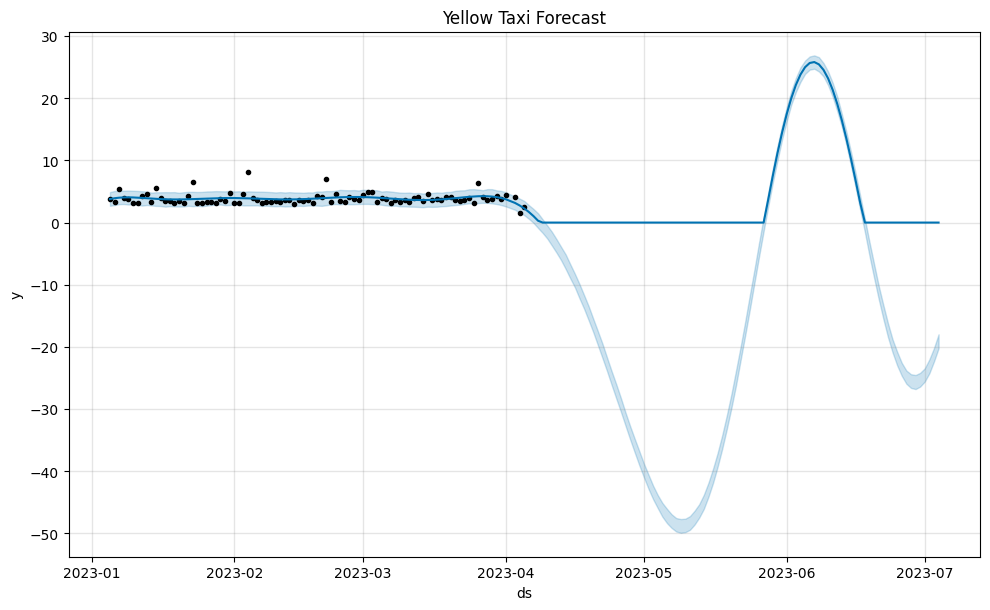

<Figure size 640x480 with 0 Axes>

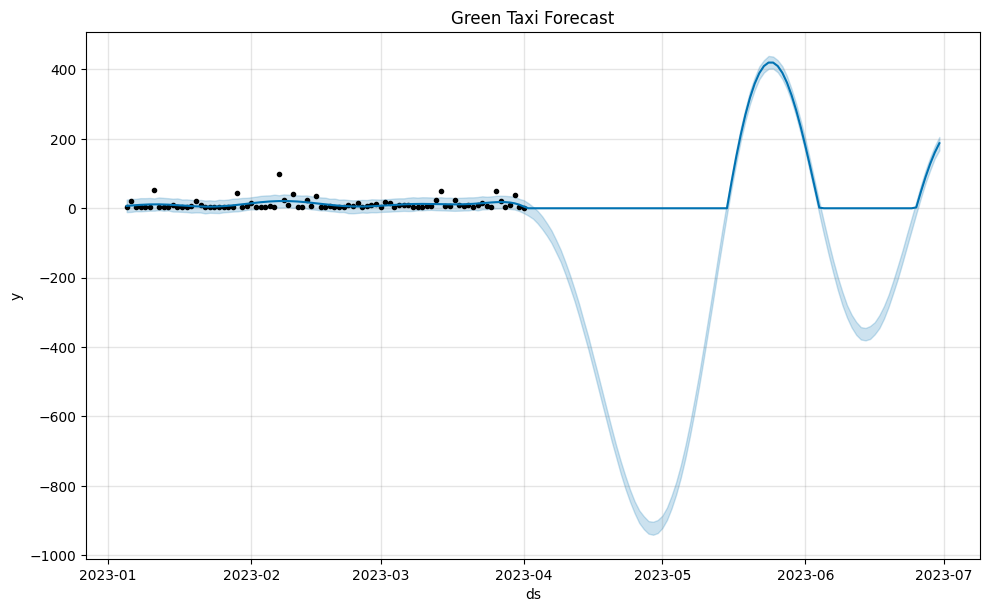

<Figure size 640x480 with 0 Axes>

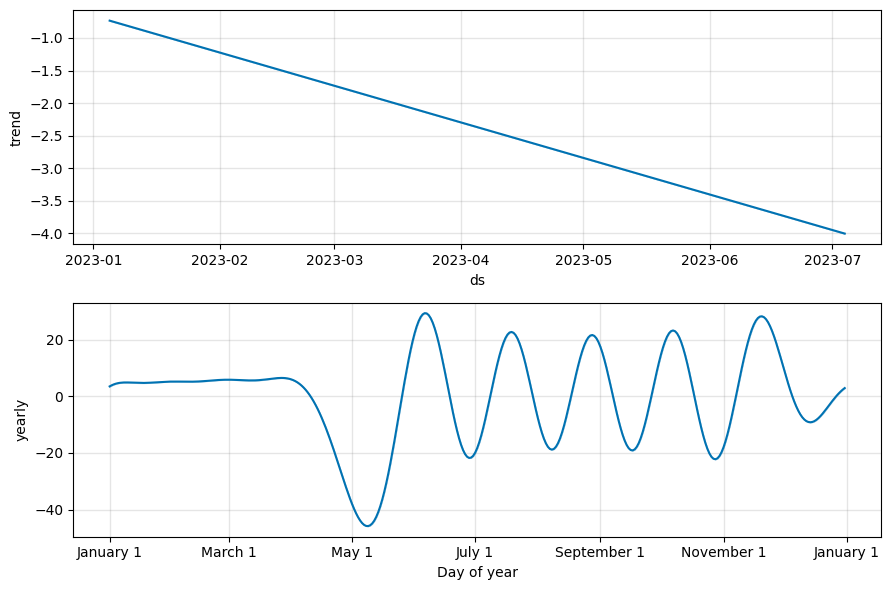

<Figure size 640x480 with 0 Axes>

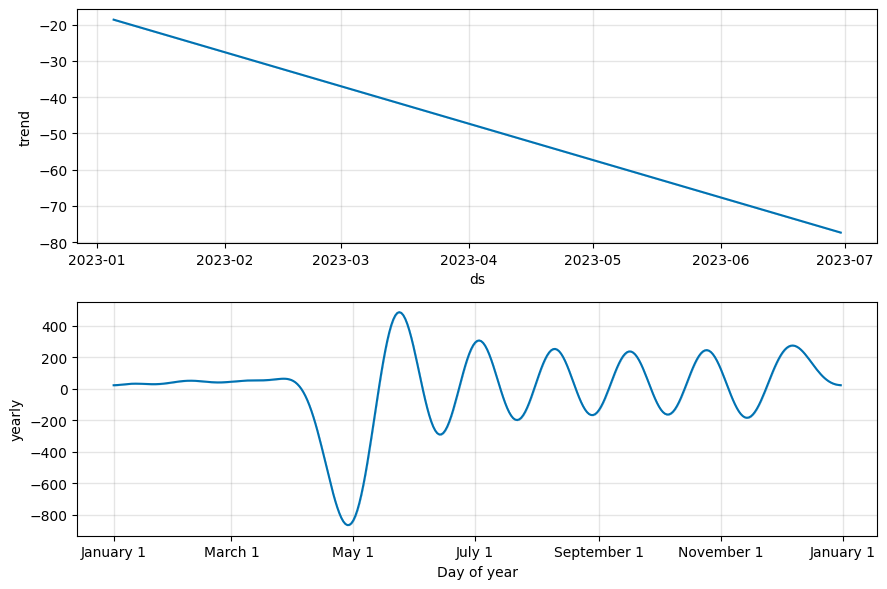

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/3 [00:00<?, ?it/s]

00:09:25 - cmdstanpy - INFO - Chain [1] start processing
00:09:25 - cmdstanpy - INFO - Chain [1] done processing
00:09:25 - cmdstanpy - INFO - Chain [1] start processing
00:09:25 - cmdstanpy - INFO - Chain [1] done processing
00:09:26 - cmdstanpy - INFO - Chain [1] start processing
00:09:26 - cmdstanpy - INFO - Chain [1] done processing


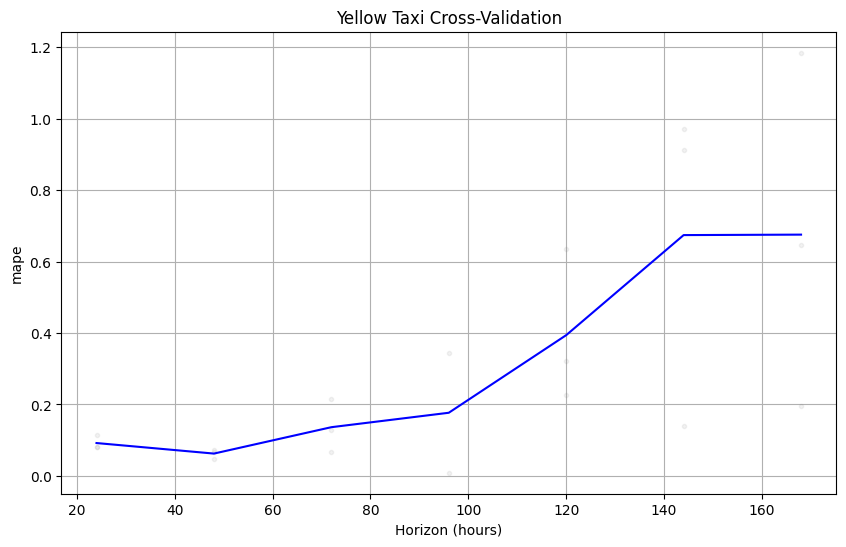

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/2 [00:00<?, ?it/s]

00:09:27 - cmdstanpy - INFO - Chain [1] start processing
00:09:27 - cmdstanpy - INFO - Chain [1] done processing
00:09:27 - cmdstanpy - INFO - Chain [1] start processing
00:09:27 - cmdstanpy - INFO - Chain [1] done processing


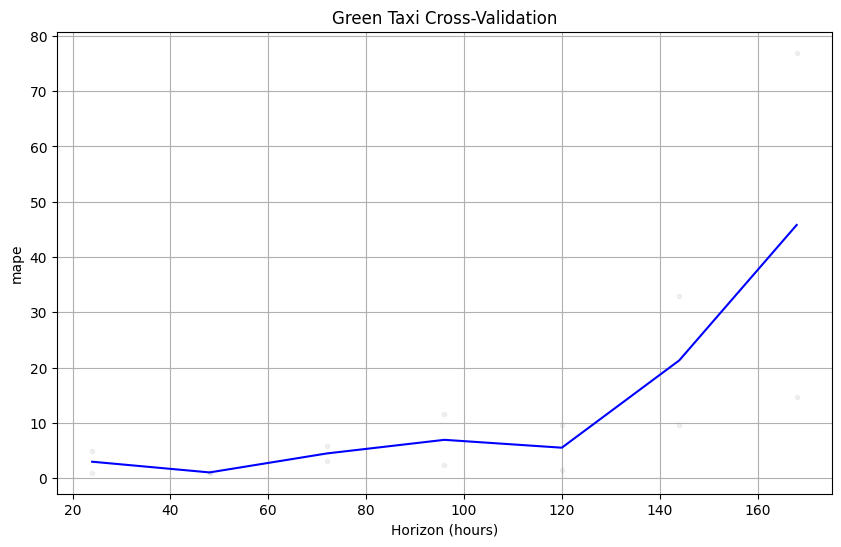

In [58]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import numpy as np
import matplotlib.pyplot as plt

# Convert to datetime and sort the dataframes
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_yellow = df_yellow.set_index('tpep_pickup_datetime')
df_green = df_green.set_index('lpep_pickup_datetime')

# Slice the dataset to the most recent month of data
most_recent_date = max(df_yellow.index.max(), df_green.index.max())
three_months_ago = most_recent_date - pd.Timedelta(days=90)

df_yellow = df_yellow[df_yellow.index > three_months_ago]
df_green = df_green[df_green.index > three_months_ago]

# Aggregate data by day
df_yellow_daily = df_yellow['trip_distance'].resample('D').mean().reset_index()
df_green_daily = df_green['trip_distance'].resample('D').mean().reset_index()

# Rename columns to fit Prophet requirements
df_yellow_daily.columns = ['ds', 'y']
df_green_daily.columns = ['ds', 'y']

# Initialize Prophet models
model_yellow = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model_green = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)

# Fit the models on the training data
model_yellow.fit(df_yellow_daily)
model_green.fit(df_green_daily)

# Create future dataframes for predictions
future_yellow = model_yellow.make_future_dataframe(periods=90)
future_green = model_green.make_future_dataframe(periods=90)

# Make predictions
forecast_yellow = model_yellow.predict(future_yellow)
forecast_green = model_green.predict(future_green)

# Set any negative predictions to zero
forecast_yellow['yhat'] = forecast_yellow['yhat'].clip(lower=0)
forecast_green['yhat'] = forecast_green['yhat'].clip(lower=0)

# Plot the forecasts
plt.figure()
model_yellow.plot(forecast_yellow, uncertainty=True)
plt.title('Yellow Taxi Forecast')
plt.show()

plt.figure()
model_green.plot(forecast_green, uncertainty=True)
plt.title('Green Taxi Forecast')
plt.show()

# Plot the forecast components
plt.figure()
model_yellow.plot_components(forecast_yellow)
plt.show()

plt.figure()
model_green.plot_components(forecast_green)
plt.show()

# Perform and plot cross-validation
df_cv_yellow = cross_validation(model_yellow, initial='60 days', period='10 days', horizon='7 days')
df_p_yellow = performance_metrics(df_cv_yellow)
fig = plot_cross_validation_metric(df_cv_yellow, metric='mape')
plt.title("Yellow Taxi Cross-Validation")
plt.show()

df_cv_green = cross_validation(model_green, initial='60 days', period='10 days', horizon='7 days')
df_p_green = performance_metrics(df_cv_green)
fig2 = plot_cross_validation_metric(df_cv_green, metric='mape')
plt.title("Green Taxi Cross-Validation")
plt.show()


### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.